### Using Machine Learning To Predict Sold Price Of Players At IPL Auction

###### |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [1]:
import statsmodels.api as sm
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("D:f\\Codes-Data-Files\\Machine Learning (Codes and Data Files)\\Data\IPL IMB381IPL2013.csv")
# write the file path here,where the file is saved on your PC. It's a CSV file, so use read_csv method

In [3]:
df.iloc[:5]  # first five records

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


I will inititate a multiple regression using sklearn. I will select all the variables as independent and sold price as dependent
variable. After this , We will print the coefficents and plot them on a graph, to visualise the effect of each variable on the 
sold price.Later I will only select the variables have a high influence on the sold price.First lets find out the categorical
variables, and convert them to dummy variables, for sklearn to work effectively, and second we will standardise the values
of all the column's.Standardising helps us in managing difference in scales of measurement of different variables.

standardised value = (value-mean)(mean of a column)/standard deviation(SD of same column)

### Encoding categorical data into dummy variables.

In [4]:
import sklearn

In [5]:
 # Choosing x variables ,that will be included for list of independent variables.
x_features= df.columns

In [6]:
x_features= x_features.drop(['Sl.NO.','BASE PRICE','PLAYER NAME','TEAM','AUCTION YEAR','SOLD PRICE'])  

#serial no ,base price,name,auction year, team is not needed/uninfluential, so I drop them from independent variables
# we are predicting sold price , so remove sold price from x _features
print(x_features)

Index(['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S',
       'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS',
       'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL'],
      dtype='object')


In [7]:
categorical_features= ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [8]:
df_encoded=pd.get_dummies(columns=categorical_features,data=df[x_features],drop_first=True)

In [9]:
df_encoded.columns    #new df creard with dummy variables

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [10]:
x_features2= df_encoded  # creating x variable

In [11]:
x = sm.add_constant(df_encoded)  # using statsmodel to add a constant of 1 to the features df

In [12]:
y=  df['SOLD PRICE'] # specifying  y variable

#### Split the dataset into 2 parts for training and testing

In [13]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=.8,random_state=42)

#### Applying multiple regression using statsmodels

In [14]:
iplmodel=sm.OLS(train_y,train_x).fit()  #fitting ordinary least squares formula to the y and x variables

In [15]:
iplmodel.params  # params method to print intercept and various slopes for explanotory variable's

const                     375827.199059
T-RUNS                       -53.789030
T-WKTS                      -132.596723
ODI-RUNS-S                    57.959956
ODI-SR-B                    -524.144970
ODI-WKTS                     815.394424
ODI-SR-BL                   -773.309199
RUNS-S                       114.720547
HS                         -5516.335398
AVE                        21560.275955
SR-B                       -1324.721784
SIXERS                      4264.100109
RUNS-C                        69.825020
WKTS                        3075.242189
AVE-BL                      5182.933487
ECON                       -6820.778058
SR-BL                      -7658.809364
AGE_2                    -230767.646329
AGE_3                    -216827.080829
COUNTRY_BAN              -122103.519643
COUNTRY_ENG               672410.765359
COUNTRY_IND               155306.401120
COUNTRY_NZ                194218.912037
COUNTRY_PAK                75921.766953
COUNTRY_SA                 64283.389419


### Hypothesis testing for the regression slope'\s.

An important step in regression analysis before a variable is considered as influential,is test of hypotheis abot the reression
coefficient's. If beta 1 is= 0, then we can conclude there is no statistically significant linear relationship between the
variables. Printting out the summary is important, as it provides us all the coefficients of all the variables used for prediction.

The null hypothesis is : there is no relationship between x and y

Alternative hypothesis : there is a relationship between x and y

##The thumb rule is ,if the p value falls below the significance value,we reject the null hypothesis.
If the P value is more than significance ,we fail to reject the null hypothesis.

We have already got the intercept as   375827.199059, And several slope values for several X's.

I have printed the summary below, which provides the t-scores and P values,let's find which variables are significant,using the 
thumb rule ,which I described above.
Assume significance of 5%,i.e ,.05

In [16]:
iplmodel.summary2() # displaying summary for the fitted model

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2025-02-23 12:08        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

In [17]:
Pvalues = iplmodel.pvalues

Pvalues <= .05  # show true or false,when P value is less than .05

const                     False
T-RUNS                    False
T-WKTS                    False
ODI-RUNS-S                False
ODI-SR-B                  False
ODI-WKTS                  False
ODI-SR-BL                 False
RUNS-S                    False
HS                         True
AVE                        True
SR-B                      False
SIXERS                    False
RUNS-C                    False
WKTS                      False
AVE-BL                    False
ECON                      False
SR-BL                     False
AGE_2                      True
AGE_3                     False
COUNTRY_BAN               False
COUNTRY_ENG                True
COUNTRY_IND               False
COUNTRY_NZ                False
COUNTRY_PAK               False
COUNTRY_SA                False
COUNTRY_SL                False
COUNTRY_WI                False
COUNTRY_ZIM               False
PLAYING ROLE_Batsman      False
PLAYING ROLE_Bowler       False
PLAYING ROLE_W. Keeper    False
CAPTAINC

Looking at the P values,only HS,AGE_2,AVE, AND COUNTRY_ENG have come out significant. for example, the P value for AVE is 0.0071
and our significance(risk tolerance) is .05, you can notice p value is less than .05. Our P value has come out less than the significance. 
Thumb rule states that" reject null hyplothesis when Pvalue<.05".

Rejecting the null hypothesis, we shall accept the alternative hypothesis,i.e, there is a statistically significant relationship between AVE and sold price.

I want you to look at the p values for the X variables, and perform a hypothesis, finally find out significant variables.

Don't forget it's a t-test with n-2 degrees of freedom.The t-scores printed above are very handy,use a t-table or excel to find
the P value,if you are unsure.


### Finding multi-collinearity between independent variable's

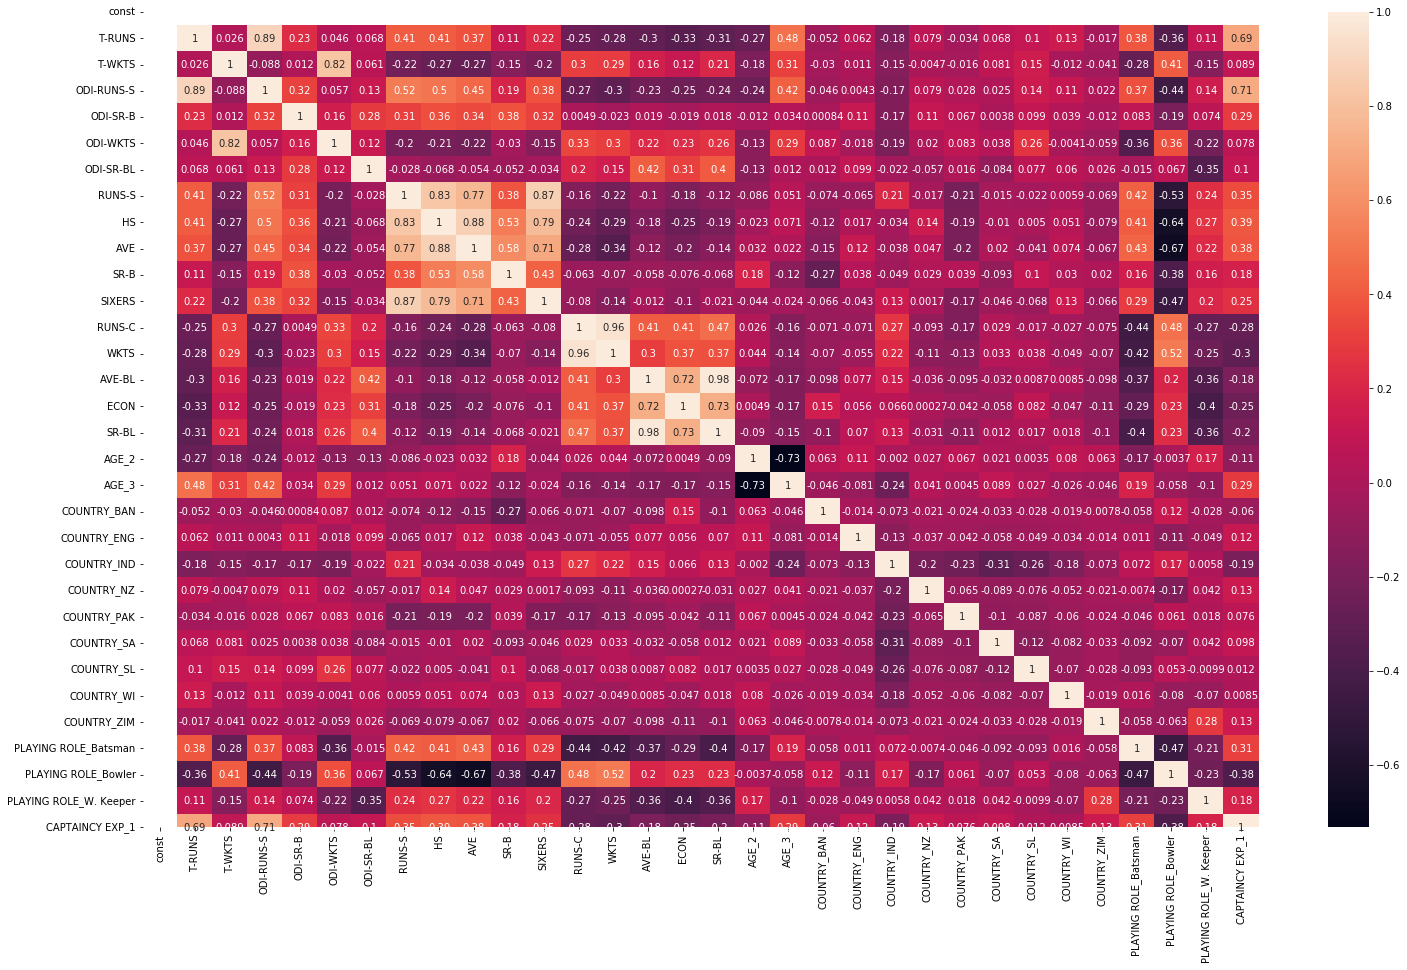

In [18]:
plt.figure(figsize=[25,15])
sb.heatmap(x.corr(),annot=True)    # double click the image to zoom in
                                   # look at the color bar to identify highly correlated variables

Provide at least 10 minutes to read the image and jot down the variables that are highly correlated(>.70)
on a paper .From the heatmap it is visible that.

T -runs and odi runs are highly correlated,whereas odi wickets and t wickects are highly correlated.

Batsman features like runs-s,hs,ave, sixers are highly correlted

Bowler's features like ave-bl,econ,sr-bl are highly correlated

To avoid multicollinearity we should keep one features from each group only,and remove the others from
the model. Which one to keep and remove depends upon the data understanding. We may iterate several times
before a good accuracy is achieved with several variables from a group.

I am removing the following features from the list of X variables.

t-tuns,t-wickets,runs -s,hs, ave,runs-c,sr-b,ave-bl,econ,odi-sr-b,odi-runs-s,age2,sr-bl

In [19]:
features_tobe_removed=['T-RUNS','T-WKTS','RUNS-S','HS','AVE','RUNS-C','SR-B','AVE-BL','ECON'
                     ,'ODI-SR-B','ODI-RUNS-S','AGE_2','SR-BL']

In [20]:
# creating new df after removing the columns
x_new_features  = x.drop(columns= features_tobe_removed,axis=1) 


I will again plot a heatmap to identify if there are variables left whcih are highly correlated with 
each other(corr>=.70). If there are any variables still left we will remove them.

Fortunately there are no variables exhibiting multi-collinearity

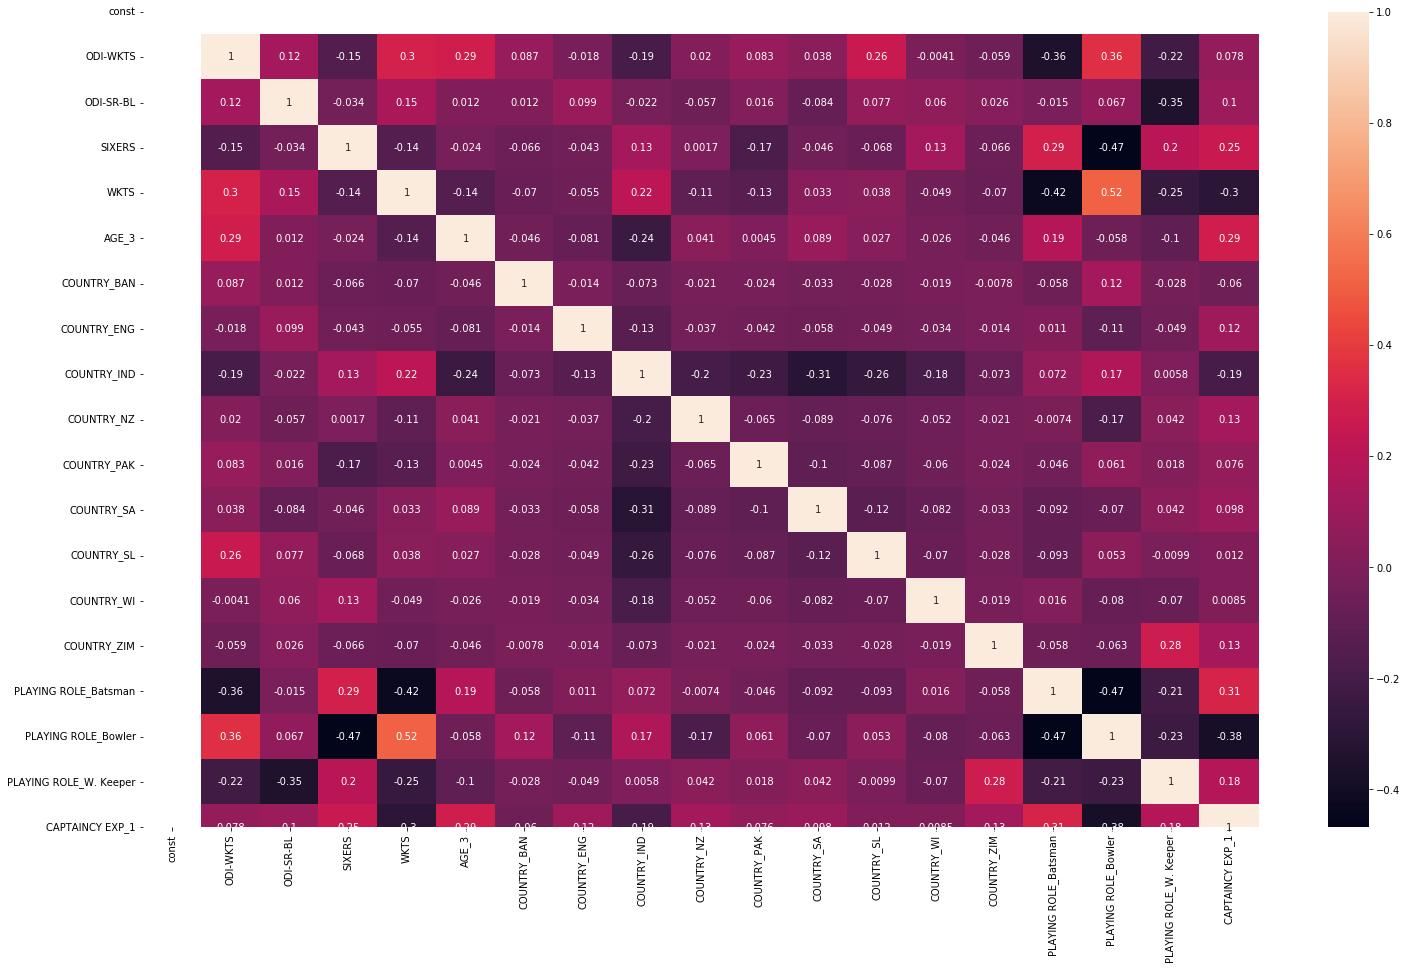

In [21]:
plt.figure(figsize=[25,15])
sb.heatmap(x_new_features.corr(),annot=True)

#### From the above heatmap analysis ,we are good to go and fit a regression again on the new ,x_new_features

In [22]:
x_new_features.info()  # we already have the constant column here,so no need to add that
# I hope you remember we converted categorical variables to dummy variable earlier,so skip it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   130 non-null    float64
 1   ODI-WKTS                130 non-null    int64  
 2   ODI-SR-BL               130 non-null    float64
 3   SIXERS                  130 non-null    int64  
 4   WKTS                    130 non-null    int64  
 5   AGE_3                   130 non-null    uint8  
 6   COUNTRY_BAN             130 non-null    uint8  
 7   COUNTRY_ENG             130 non-null    uint8  
 8   COUNTRY_IND             130 non-null    uint8  
 9   COUNTRY_NZ              130 non-null    uint8  
 10  COUNTRY_PAK             130 non-null    uint8  
 11  COUNTRY_SA              130 non-null    uint8  
 12  COUNTRY_SL              130 non-null    uint8  
 13  COUNTRY_WI              130 non-null    uint8  
 14  COUNTRY_ZIM             130 non-null    ui

### Split the dataset into 2 parts for training and testing

In [23]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x_new_features,y,train_size=.80,random_state=42)


In [24]:

ipl_newmodel=sm.OLS(train_y,train_x).fit()

In [25]:
ipl_newmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.306     
Dependent Variable:        SOLD PRICE              AIC:                       2965.1884 
Date:                      2025-02-23 12:08        BIC:                       3015.4318 
No. Observations:          104                     Log-Likelihood:            -1463.6   
Df Model:                  18                      F-statistic:               3.528     
Df Residuals:              85                      Prob (F-statistic):        4.30e-05  
R-squared:                 0.428                   Scale:                     1.1990e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   165018.2667 131136.4610  1.2584 0.2117  -95716.1501  425752.6836
ODI-WKTS                   734.1123    470.0331  1.5618 0.1220    -200.4395    1668.6640
ODI-SR-BL                  170.3522   1392.9386  0.1223 0.9030   -2599.1829    2939.8873
SIXERS                    7307.8965   2125.6957  3.4379 0.0009    3081.4440   11534.3490
WKTS                      1884.7059   2142.8312  0.8795 0.3816   -2375.8166    6145.2283
AGE_3                   -42449.0085 101272.3502 -0.4192 0.6762 -243805.5722  158907.5552
COUNTRY_BAN            -191407.4393 373842.5107 -0.5120 0.6100 -934706.5057  551891.6272
COUNTRY_ENG             583513.6319 229452.7234  2.5431 0.0128  127300.1459 1039727.1180
COUNTRY_IND             222389.6877 107222.7169  2.0741 0.0411    9202.2008  435577.1746
COUNTRY_NZ               53596.1153 167166.8285  0.3206 0.7493 -278776.3249  385968.5556
COUNTRY_PAK              32828.5971 174395.9067  0.1882 0.8511 -313917.1874  379574.3815
COUNTRY_SA               20920.3202 134264.9930  0.1558 0.8765 -246034.4565  287875.0968
COUNTRY_SL              -15518.2591 152736.9322 -0.1016 0.9193 -319200.1997  288163.6815
COUNTRY_WI             -109502.5138 223369.7286 -0.4902 0.6252 -553621.3766  334616.3490
COUNTRY_ZIM            -133932.3067 393050.9282 -0.3408 0.7341 -915422.8532  647558.2398
PLAYING ROLE_Batsman     48413.3640 121109.2299  0.3997 0.6903 -192384.2311  289210.9590
PLAYING ROLE_Bowler     -65826.8428 112220.2651 -0.5866 0.5590 -288950.7945  157297.1089
PLAYING ROLE_W. Keeper -138290.1304 181788.9771 -0.7607 0.4489 -499735.3194  223155.0586
CAPTAINCY EXP_1         223581.1522  98540.3915  2.2689 0.0258   27656.4541  419505.8502
----------------------------------------------------------------------------------------
Omnibus:                     10.464               Durbin-Watson:                  2.331 
Prob(Omnibus):               0.005                Jarque-Bera (JB):               10.537
Skew:                        0.710                Prob(JB):                       0.005 
Kurtosis:                    3.643                Condition No.:                  1553  
========================================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

The accuracy is .428 i.e, the explained variation in y is only 43%, there is a lot of unexplained variation (errors) that needs to be accounted for.

Certainly anyone , reading my codes and steps would get bored and would not follow further.Are you the one?. Don't be the that one, please. Most people run sklearn , check the accuracy ,precision and
tell their stakeholder's ,"This is what should be".Please, always check for multi-collearnity and selection of variable's,if you want to be a good Data Analyst.

I could have finished this project in few lines,but this is not my style of work.I have reasons and
arguments for eaach and evey code I type to reply to your queries. Be that professional, who has the
answers for each and every question put upon you.Though it takes a lot of codes execution,later it pays you,to be called as a perfect predictor.So ,never ever try to finish a project just to add it to
your blog or portfolio.


### The following steps will increase the Rsquare value for the model. I will only select the variables that are statistically significant at a significance of 5% ,i.e their Pvalue is less than .05 and finally rejecting the Null Hypothesis. You will be astonished to notice that, the model's accuracy will shoot up by 28%

### The Null Hypothesis is : There is no relationship between x and y  variables                                

### Alternative Hypothesis : There is a relationship between x and y variables

Please go and read above about the Hypothesis and significance I wrote about. If you feel uncomfortable
with this regression method using StatsModels, you are freee to use sklearn and predict the sold price.
I always try to be with the flow of data,so Sklearn is last ,but not the least for me.

In [26]:
ipl_newmodel.pvalues<.05   # looking at the p values which are less than .05
                           # true=Pvalue<.05  false=Pvalue>.05

const                     False
ODI-WKTS                  False
ODI-SR-BL                 False
SIXERS                     True
WKTS                      False
AGE_3                     False
COUNTRY_BAN               False
COUNTRY_ENG                True
COUNTRY_IND                True
COUNTRY_NZ                False
COUNTRY_PAK               False
COUNTRY_SA                False
COUNTRY_SL                False
COUNTRY_WI                False
COUNTRY_ZIM               False
PLAYING ROLE_Batsman      False
PLAYING ROLE_Bowler       False
PLAYING ROLE_W. Keeper    False
CAPTAINCY EXP_1            True
dtype: bool

### Let's create a list of significant variables based on the P values above, and including them only, for prediction

In [27]:
significance_variables=['COUNTRY_IND','COUNTRY_ENG','SIXERS','CAPTAINCY EXP_1']
#selecting only those features that qualify according to Pvalue hypothesis test, to include in X's

In [28]:
ipl_data_final=x_new_features[['COUNTRY_IND','COUNTRY_ENG','SIXERS','CAPTAINCY EXP_1']] 

In [29]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(ipl_data_final,y,train_size=.80,random_state=42)

# asking sklearn to split the ipl final data, for training and testing

In [30]:
ipl_model_2= sm.OLS(train_y,train_x).fit()  # fitting ols method on data

In [31]:
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2025-02-23 12:08 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

Pvalues,significance values ,accepting , and rejecting the Null Hypothesis is only valid, if and only if
the data we are dealing with follows normal distribution.If the IPL data doesn't follow normal distribution,
or any other statistical distribution then , the P values and decisions we took earlier about including or
excluding a explanatory variable doesn't hold any significant rank in our analysis.

What to do , to know that our variables follow normal distribution?????

The first major assumption in regression analysis is to know and test , do the residuals I'm dealing with follow normal distribution?. For this task we will  plot a pp-plot of the residuals and compare them with the theoretical normal distribution.

### Testing the assumption "Normality of residuals".

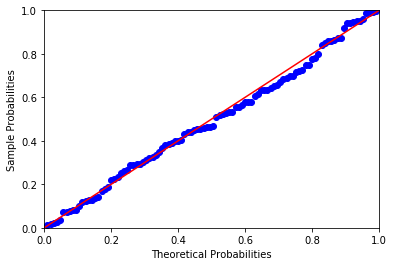

In [32]:
 # Extracting residuals from the iplmodel and storing them
probplot= sm.ProbPlot(ipl_model_2.resid,fit=True)

# the diagonal line is the cumulative probabilites for a theoretical normal distribution
probplot.ppplot(line='45')
plt.show() 

### It's cleary visible ,the residuals follow an approximated normal distribution

### Testing the assumption "Homoscedastity"

One more assumption in regression is, the variance of the residuls is constant across different values
of the predicted Y. It is a plot between standardised residual values and standardises predicted values
of the variable Y. If we observe a funnel shape or trend in the graph, then it implies that, resiuals
are heterodastity(non constant variance).

In [33]:
 # Storing regression residuals to residuals
residuals= ipl_model_2.resid                

# Storing fitted values of sold price to fitted
fitted= ipl_model_2.fittedvalues

# Creating standardiesd values of fitted values
standardised_fitted= (fitted-(fitted.mean()))/(fitted.std())   

# Creating standardiesd values of residuals
standardised_residuals= (residuals-(residuals.mean()))/residuals.std()

# Standardised value = value-sum of values.mean()/values.std()

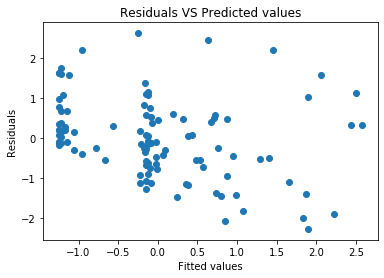

In [34]:
plt.title("Residuals VS Predicted values")
plt.xlabel("Fitted values")
plt.ylabel('Residuals')
plt.scatter(x=standardised_fitted,y=standardised_residuals)


#### No trend or funnel shape is observed from the above graph. It means the variance is constant for fitted values of Y.It's a green signal to go ahead and accept the model. But we will also look at influence variables next.

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 576x432 with 0 Axes>

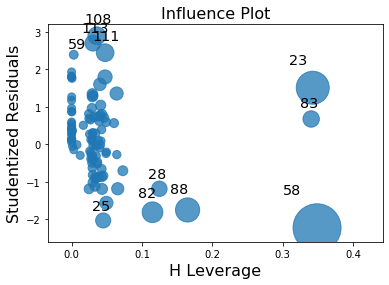

In [35]:
plt.figure(figsize=[8,6])
sm.graphics.influence_plot(ipl_model_2)
plt.show

Tehe plot shows that obsearvations 23,83,58 have high leverage with resisuls.Mostly observations beyond
the cutoff leveage value can be removed from the dataset, as they are highly influencial records. Let's find out the leverage cutoff.


The formaula is =3*(K+1)/N.

k= the number of independent variables

N=Total sample size or number of observations used for training ,not testing

In [36]:
K=train_x.shape[1]      # finding k
N=train_x.shape[0]      #finding n

print("K",train_x.shape[1],sep='=') 
print('N',train_x.shape[0],sep='=')  

leverage_cutoff=3*(K+1)/(N)  #specifying formula

print('leverage cutoff is',leverage_cutoff,sep='|')

K=4
N=104
leverage cutoff is|0.14423076923076922


The observations above .144 is highly influencial.It depends on the data, and number of highly influencial variables ,to decide to remove or keep the records. 23,83,58 observations are higly influential as the size of cirlce
is big.I am not remove these observation,as we have only 3 records here. You can remove the records
and check for RSquare value jum'ps. Now we will try to find where these records are plcaed in the dataset.

In [37]:
df[df.index.isin([23,83,58])]  #these are the 3 player's with higher leverage cutoff 

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


### Transforming dependent Y ,to increase R-Square value.

We will derive a new Y variable by taking its square root using numpy methods.

In [38]:
import numpy as np

In [39]:
train_y= np.sqrt(train_y)
train_x= train_x


In [40]:
ipl_model_4= sm.OLS(train_y,train_x).fit()

In [41]:
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2025-02-23 12:08 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

Now, after taking squares of the Y variable, we are getting an increased RSquare value of 75.1%.You can
try different combinations of x and y variable, using cox and box transformaation available. This is
trial and error, and must be run several times to arrive at the final conclusion.
The fourth model is good to go with at this point. Let's check whether resisuals are normally distributed or not, by plotting a ppplot

<function matplotlib.pyplot.show(*args, **kw)>

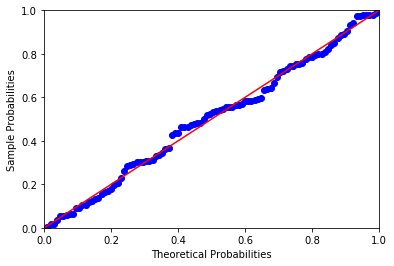

In [42]:
probplot=sm.ProbPlot(ipl_model_4.resid,fit=True)      #storing probplot from residuals
probplot.ppplot(line='45')                            # line=45, to plot a 45degree line on the chart
plt.show

The residuals are approximately normally distributed as line and the dots merges well together.This last model explains 75% of the variation in sold price and the rest 25% is the unexplained variation for the model.